In [1]:
# IDENTIFIERS

# shop_ID : Shop's unique identifier.
# day_of_the_week : Encoded from 0 to 6.
# date : day, month and year of the data point.
# number of customers : Quantity of customers that showed up that day.
# open : Binary variable equal to 0 if shop closed that day and 1 if shop open.
# promotion : Binary variable equal to 0 if shop had no promotions that day and 1 if it did.
# state_holiday : Encoded 0, a, b, c indicating if there was a state holiday at all (0 if not), and otherwise, the number indicates which state holiday it was.
# school_holiday : Binary variable equal to 0 if there was a school holiday that day and 1 if not

In [2]:
## columns
# shop_ID: shop's unique identifier
# day_of_the week: Encoded from 0 to 6
# date: data, month and year of the data point.
# number of costumers: Quantity of costumers that showed up that day
# open : Binary variable equial to 0 if shop closed that day 1 if shop open
# promotion: Binary variable equal to 0 is shop had no  promotions that day and 1 if it did had a promotion
# state_holiday: Encoded 0, a,b,c indicating there was a state holiday at all (0 if not), and otherwise the number
# indicates which state holiday it was
# school_holiday: Binary variable

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
sales_stores = pd.read_csv('sales.csv')

In [6]:
sales_stores

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [7]:
sales_stores.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [8]:
sales_stores.tail()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344
640839,305711,695,7,2015-05-03,0,0,0,0,0,0


In [9]:
sales_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [10]:
sales_stores.isnull().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [11]:
display(sales_stores.duplicated().sum()) 

0

In [12]:
display(sales_stores['state_holiday'].value_counts(dropna=False))
display(sales_stores['school_holiday'].value_counts(dropna=False))


0    621160
a     12842
b      4214
c      2624
Name: state_holiday, dtype: int64

0    526468
1    114372
Name: school_holiday, dtype: int64

In [13]:
sales_stores['day_of_week'] = sales_stores['day_of_week'].astype(str)
sales_stores['promotion'] = sales_stores['promotion'].astype(str)
sales_stores['date'] = pd.to_datetime(sales_stores['date'])
sales_stores['state_holiday'] = sales_stores['state_holiday'].astype(str)
sales_stores['school_holiday'] = sales_stores['school_holiday'].astype(str)
sales_stores['open'] = sales_stores['open'].astype(str)
#sales_stores['store_ID'] = sales_stores['store_ID'].astype(str)

In [14]:
sales_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           640840 non-null  int64         
 1   store_ID             640840 non-null  int64         
 2   day_of_week          640840 non-null  object        
 3   date                 640840 non-null  datetime64[ns]
 4   nb_customers_on_day  640840 non-null  int64         
 5   open                 640840 non-null  object        
 6   promotion            640840 non-null  object        
 7   state_holiday        640840 non-null  object        
 8   school_holiday       640840 non-null  object        
 9   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 48.9+ MB


In [15]:
for col in sales_stores:
    print(col, ': Number of Distinct Values: ', len(sales_stores[col].unique()))

Unnamed: 0 : Number of Distinct Values:  640840
store_ID : Number of Distinct Values:  1115
day_of_week : Number of Distinct Values:  7
date : Number of Distinct Values:  942
nb_customers_on_day : Number of Distinct Values:  3886
open : Number of Distinct Values:  2
promotion : Number of Distinct Values:  2
state_holiday : Number of Distinct Values:  4
school_holiday : Number of Distinct Values:  2
sales : Number of Distinct Values:  20129


In [16]:
sales_stores['store_ID'] = sales_stores['store_ID'].astype(str)

In [17]:
pivot_table = pd.pivot_table(sales_stores, values='sales', index='state_holiday', aggfunc='mean')

pivot_table


,sales
state_holiday,
0,5952.206403
a,282.368167
b,252.936877
c,178.606707


In [18]:
pivot_table_2 = pd.pivot_table(sales_stores, values='sales', index='school_holiday', aggfunc='mean')

pivot_table_2

,sales
school_holiday,
0,5625.813723
1,6475.556447


In [19]:
sales_stores['state_holiday'] = sales_stores['state_holiday'].replace(['a', 'b', 'c'], '1')
sales_stores ['state_holiday'].unique()

array(['0', '1'], dtype=object)

In [20]:
display(sales_stores['state_holiday'].value_counts(dropna=False))

0    621160
1     19680
Name: state_holiday, dtype: int64

In [21]:
min_date = sales_stores['date'].min()
max_date = sales_stores['date'].max()

# Print the results
print("Minimum date:", min_date.strftime('%d-%m-%Y'))
print("Maximum date:", max_date.strftime('%d-%m-%Y'))

Minimum date: 01-01-2013
Maximum date: 31-07-2015


In [22]:
#display(sales_stores[sales_stores['date'] == '2013-11-26'].head(100))### Checking Thanks giving day

In [23]:
#display(sales_stores[sales_stores['date'] == '2013-12-25'].head(100))## Checking Xmas

In [24]:
#display(sales_stores[(sales_stores['date'] == '2013-12-25') & ((sales_stores['open'] == '1'))])

In [25]:
sales_stores 

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [26]:
sales_stores = sales_stores.drop(['Unnamed: 0', 'date'], axis=1)
sales_stores

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,517,1,0,0,0,4422
1,394,6,694,1,0,0,0,8297
2,807,4,970,1,1,0,0,9729
3,802,2,473,1,1,0,0,6513
4,726,4,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,4553
640836,97,1,987,1,1,0,0,12307
640837,987,1,925,1,0,0,0,6800
640838,1084,4,725,1,0,0,0,5344


In [27]:
def differentiate_numerical_types(df):
    # Select numerical columns of type float64 and int64 in sales_stores
    numerical_df = sales_stores.select_dtypes(include=['float64', 'int64'])
    
    # Select categorical columns of type object
    categorical_df = sales_stores.select_dtypes(include=['object'])
    
    return numerical_df, categorical_df

# Call the function to get numerical and categorical variables
numerical_df, categorical_df = differentiate_numerical_types(sales_stores)


In [28]:
numerical_df

,nb_customers_on_day,sales
0,517,4422
1,694,8297
2,970,9729
3,473,6513
4,1068,10882
...,...,...
640835,483,4553
640836,987,12307
640837,925,6800
640838,725,5344


In [29]:
#numerical_df_columns = sales_stores.select_dtypes(include=['number'])

# Plot box plots for each numeric column
#for column in numerical_df_columns.columns:
    #plt.figure(figsize=(8, 6))
    #sns.boxplot(x=numerical_df_columns[column])  # Remove 'data=df', as you've specified the DataFrame earlier
    #plt.title(f'Box Plot of {column}')
    #plt.xlabel(column)
    #plt.show()

In [30]:
def find_outliers_iqr(df, factor=1.5):
    # Calculating the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculating the IQR (Interquartile Range) for each column
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds for identifying outliers
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Finding outliers by comparing values to the bounds
    outliers = ((df < lower_bound) | (df > upper_bound))
    
    # Count the number of outliers in each column
    outlier_count = outliers.sum()
    
    outlier_info = pd.DataFrame({'Columns': outlier_count.index, 'Outlier Count': outlier_count.values})
    
    return outliers, outlier_info

# Set the IQR factor for outlier detection (default is 1.5)
iqr_factor = 1.5

# Find outliers in the continuous_df DataFrame and get outlier counts
outliers, outlier_info = find_outliers_iqr(numerical_df, factor=iqr_factor)

# Display the DataFrame of outliers (True indicates an outlier)
print("Outliers:")
print(outliers)

# Display the DataFrame with outlier counts
print("\nOutlier Counts:")
outlier_info

Outliers:
        nb_customers_on_day  sales
0                     False  False
1                     False  False
2                     False  False
3                     False  False
4                     False  False
...                     ...    ...
640835                False  False
640836                False  False
640837                False  False
640838                False  False
640839                False  False

[640840 rows x 2 columns]

Outlier Counts:


,Columns,Outlier Count
0,nb_customers_on_day,23941
1,sales,16821


In [31]:
#plt.bar(sales_stores['day_of_week'], sales_stores['nb_customers_on_day'])
#plt.xlabel('Day of Week')
#plt.ylabel('No. Customers')
#plt.show()

In [32]:
#plt.bar(sales_stores['day_of_week'], sales_stores['sales'])
#plt.xlabel('Day of Week')
#plt.ylabel('Sales')
#plt.show()

In [33]:
#plt.scatter(sales_stores['day_of_week'], sales_stores['sales'])
#plt.xlabel('Day of Week')
#plt.ylabel('Sales')
#plt.show()

C:\Users\Startklar\AppData\Local\Temp\ipykernel_19192\1360685025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = sales_stores.corr()


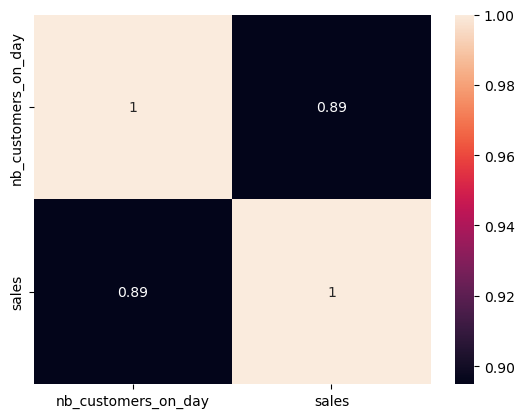

In [34]:
correlations_matrix = sales_stores.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [35]:
##Droping store ID
#store_id_Dataframe= sales_stores['store_ID']
#sales_stores.drop(['store_ID'], axis=1)

In [36]:
#store_id_Dataframe

In [37]:
#import pandas as pd

# Assuming store_id_Dataframe is the variable you want to check
#if isinstance(store_id_Dataframe, pd.DataFrame):
    #print("store_id_Dataframe is a DataFrame")
#else:
    #print("store_id_Dataframe is not a DataFrame")


In [38]:
#import pandas as pd

# Assuming store_id_Dataframe is the variable you want to convert to a DataFrame
#if not isinstance(store_id_Dataframe, pd.DataFrame):
    #store_id_Dataframe = pd.DataFrame(store_id_Dataframe)

# Now store_id_Dataframe is guaranteed to be a DataFrame


In [39]:
#if isinstance(store_id_Dataframe, pd.DataFrame):
    #print("store_id_Dataframe is a DataFrame")
#else:
    #print("store_id_Dataframe is not a DataFrame")


In [40]:
#store_id_Dataframe

In [41]:
### Problem statement They want to know the revenue of each store each day in order to decide their future steps as a company

In [42]:
##The objective is to analyse or predict the revenue of the shops in each day

In [43]:
y = sales_stores['sales']
X = sales_stores.drop(['sales'], axis=1)


# Note: we need to do train/test split before upsampling, and then only upsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [44]:
numericalX_train

,nb_customers_on_day
506261,335
488655,692
255408,705
131095,0
151381,342
...,...
359783,507
152315,717
117952,803
435829,0


In [45]:
categoricalX_train

,store_ID,day_of_week,open,promotion,state_holiday,school_holiday
506261,488,3,1,0,0,0
488655,848,6,1,0,0,0
255408,922,5,1,0,0,0
131095,393,7,0,0,0,0
151381,21,2,1,0,0,1
...,...,...,...,...,...,...
359783,945,4,1,0,0,0
152315,776,1,1,1,0,0
117952,369,1,1,1,0,1
435829,756,7,0,0,0,0


In [46]:
numericalX_test

,nb_customers_on_day
373000,428
591835,517
358087,768
399451,978
387267,630
...,...
559487,1481
234811,0
283007,949
244697,0


In [47]:
#categoricalX_train_1 =categoricalX_train.drop(['store_ID'], axis=1)
#categoricalX_train_1

In [48]:
#categoricalX_test_1 =categoricalX_test.drop(['store_ID'], axis=1)
#categoricalX_test_1

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [51]:
encoded_categorical_test

store_ID_10  store_ID_100  store_ID_1000  store_ID_1001  \
0               0.0           0.0            0.0            0.0   
1               0.0           0.0            0.0            0.0   
2               0.0           0.0            0.0            0.0   
3               0.0           0.0            0.0            0.0   
4               0.0           0.0            0.0            0.0   
...             ...           ...            ...            ...   
128163          0.0           0.0            0.0            0.0   
128164          0.0           0.0            0.0            0.0   
128165          0.0           0.0            0.0            0.0   
128166          0.0           0.0            0.0            0.0   
128167          0.0           0.0            0.0            0.0   

        store_ID_1002  store_ID_1003  store_ID_1004  store_ID_1005  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0            0.0   
128165            0.0            0.0            0.0            0.0   
128166            0.0            0.0            0.0            0.0   
128167            0.0            0.0            0.0            0.0   

        store_ID_1006  store_ID_1007  store_ID_1008  store_ID_1009  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0            0.0   
128165            0.0            0.0            0.0            0.0   
128166            0.0            0.0            0.0            0.0   
128167            0.0            0.0            0.0            0.0   

        store_ID_101  store_ID_1010  store_ID_1011  store_ID_1012  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
128163           0.0            0.0            0.0            0.0   
128164           0.0            0.0            0.0            0.0   
128165           0.0            0.0            0.0            0.0   
128166           0.0            0.0            0.0            0.0   
128167           0.0            0.0            0.0            0.0   

        store_ID_1013  store_ID_1014  store_ID_1015  store_ID_1016  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0            0.0   
128165            0.0            0.0            0.0           

In [52]:
encoded_categorical_train

store_ID_10  store_ID_100  store_ID_1000  store_ID_1001  \
0               0.0           0.0            0.0            0.0   
1               0.0           0.0            0.0            0.0   
2               0.0           0.0            0.0            0.0   
3               0.0           0.0            0.0            0.0   
4               0.0           0.0            0.0            0.0   
...             ...           ...            ...            ...   
512667          0.0           0.0            0.0            0.0   
512668          0.0           0.0            0.0            0.0   
512669          0.0           0.0            0.0            0.0   
512670          0.0           0.0            0.0            0.0   
512671          0.0           0.0            0.0            0.0   

        store_ID_1002  store_ID_1003  store_ID_1004  store_ID_1005  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_1006  store_ID_1007  store_ID_1008  store_ID_1009  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_101  store_ID_1010  store_ID_1011  store_ID_1012  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
512667           0.0            0.0            0.0            0.0   
512668           0.0            0.0            0.0            0.0   
512669           0.0            0.0            0.0            0.0   
512670           0.0            0.0            0.0            0.0   
512671           0.0            0.0            0.0            0.0   

        store_ID_1013  store_ID_1014  store_ID_1015  store_ID_1016  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0           

In [55]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [56]:
scaled_numerical_train

,nb_customers_on_day
0,0.062187
1,0.128457
2,0.130871
3,0.000000
4,0.063486
...,...
512667,0.094115
512668,0.133098
512669,0.149063
512670,0.000000


In [57]:
scaled_numerical_train

,nb_customers_on_day
0,0.062187
1,0.128457
2,0.130871
3,0.000000
4,0.063486
...,...
512667,0.094115
512668,0.133098
512669,0.149063
512670,0.000000


In [58]:
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [59]:
X_train_treated

nb_customers_on_day  store_ID_10  store_ID_100  store_ID_1000  \
0                  0.062187          0.0           0.0            0.0   
1                  0.128457          0.0           0.0            0.0   
2                  0.130871          0.0           0.0            0.0   
3                  0.000000          0.0           0.0            0.0   
4                  0.063486          0.0           0.0            0.0   
...                     ...          ...           ...            ...   
512667             0.094115          0.0           0.0            0.0   
512668             0.133098          0.0           0.0            0.0   
512669             0.149063          0.0           0.0            0.0   
512670             0.000000          0.0           0.0            0.0   
512671             0.194171          0.0           0.0            0.0   

        store_ID_1001  store_ID_1002  store_ID_1003  store_ID_1004  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_1005  store_ID_1006  store_ID_1007  store_ID_1008  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_1009  store_ID_101  store_ID_1010  store_ID_1011  \
0                 0.0           0.0            0.0            0.0   
1                 0.0           0.0            0.0            0.0   
2                 0.0           0.0            0.0            0.0   
3                 0.0           0.0            0.0            0.0   
4                 0.0           0.0            0.0            0.0   
...               ...           ...            ...            ...   
512667            0.0           0.0            0.0            0.0   
512668            0.0           0.0            0.0            0.0   
512669            0.0           0.0            0.0            0.0   
512670            0.0           0.0            0.0            0.0   
512671            0.0           0.0            0.0            0.0   

        store_ID_1012  store_ID_1013  store_ID_1014  store_ID_1015  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0         

In [60]:
X_test_treated

nb_customers_on_day  store_ID_10  store_ID_100  store_ID_1000  \
0                  0.079451          0.0           0.0            0.0   
1                  0.095972          0.0           0.0            0.0   
2                  0.142565          0.0           0.0            0.0   
3                  0.181548          0.0           0.0            0.0   
4                  0.116948          0.0           0.0            0.0   
...                     ...          ...           ...            ...   
128163             0.274921          0.0           0.0            0.0   
128164             0.000000          0.0           0.0            0.0   
128165             0.176165          0.0           0.0            0.0   
128166             0.000000          0.0           0.0            0.0   
128167             0.139967          0.0           0.0            0.0   

        store_ID_1001  store_ID_1002  store_ID_1003  store_ID_1004  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0            0.0   
128165            0.0            0.0            0.0            0.0   
128166            0.0            0.0            0.0            0.0   
128167            0.0            0.0            0.0            0.0   

        store_ID_1005  store_ID_1006  store_ID_1007  store_ID_1008  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0            0.0   
128165            0.0            0.0            0.0            0.0   
128166            0.0            0.0            0.0            0.0   
128167            0.0            0.0            0.0            0.0   

        store_ID_1009  store_ID_101  store_ID_1010  store_ID_1011  \
0                 0.0           0.0            0.0            0.0   
1                 0.0           0.0            0.0            0.0   
2                 0.0           0.0            0.0            0.0   
3                 0.0           0.0            0.0            0.0   
4                 0.0           0.0            0.0            0.0   
...               ...           ...            ...            ...   
128163            0.0           0.0            0.0            0.0   
128164            0.0           0.0            0.0            0.0   
128165            0.0           0.0            0.0            0.0   
128166            0.0           0.0            0.0            0.0   
128167            0.0           0.0            0.0            0.0   

        store_ID_1012  store_ID_1013  store_ID_1014  store_ID_1015  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
128163            0.0            0.0            0.0            0.0   
128164            0.0            0.0            0.0         

In [61]:
display(X_train_treated.head())
display(y_train)

,nb_customers_on_day,store_ID_10,store_ID_100,store_ID_1000,store_ID_1001,store_ID_1002,store_ID_1003,store_ID_1004,store_ID_1005,store_ID_1006,store_ID_1007,store_ID_1008,store_ID_1009,store_ID_101,store_ID_1010,store_ID_1011,store_ID_1012,store_ID_1013,store_ID_1014,store_ID_1015,store_ID_1016,store_ID_1017,store_ID_1018,store_ID_1019,store_ID_102,store_ID_1020,store_ID_1021,store_ID_1022,store_ID_1023,store_ID_1024,store_ID_1025,store_ID_1026,store_ID_1027,store_ID_1028,store_ID_1029,store_ID_103,store_ID_1030,store_ID_1031,store_ID_1032,store_ID_1033,store_ID_1034,store_ID_1035,store_ID_1036,store_ID_1037,store_ID_1038,store_ID_1039,store_ID_104,store_ID_1040,store_ID_1041,store_ID_1042,store_ID_1043,store_ID_1044,store_ID_1045,store_ID_1046,store_ID_1047,store_ID_1048,store_ID_1049,store_ID_105,store_ID_1050,store_ID_1051,store_ID_1052,store_ID_1053,store_ID_1054,store_ID_1055,store_ID_1056,store_ID_1057,store_ID_1058,store_ID_1059,store_ID_106,store_ID_1060,store_ID_1061,store_ID_1062,store_ID_1063,store_ID_1064,store_ID_1065,store_ID_1066,store_ID_1067,store_ID_1068,store_ID_1069,store_ID_107,store_ID_1070,store_ID_1071,store_ID_1072,store_ID_1073,store_ID_1074,store_ID_1075,store_ID_1076,store_ID_1077,store_ID_1078,store_ID_1079,store_ID_108,store_ID_1080,store_ID_1081,store_ID_1082,store_ID_1083,store_ID_1084,store_ID_1085,store_ID_1086,store_ID_1087,store_ID_1088,store_ID_1089,store_ID_109,store_ID_1090,store_ID_1091,store_ID_1092,store_ID_1093,store_ID_1094,store_ID_1095,store_ID_1096,store_ID_1097,store_ID_1098,store_ID_1099,store_ID_11,store_ID_110,store_ID_1100,store_ID_1101,store_ID_1102,store_ID_1103,store_ID_1104,store_ID_1105,store_ID_1106,store_ID_1107,store_ID_1108,store_ID_1109,store_ID_111,store_ID_1110,store_ID_1111,store_ID_1112,store_ID_1113,store_ID_1114,store_ID_1115,store_ID_112,store_ID_113,store_ID_114,store_ID_115,store_ID_116,store_ID_117,store_ID_118,store_ID_119,store_ID_12,store_ID_120,store_ID_121,store_ID_122,store_ID_123,store_ID_124,store_ID_125,store_ID_126,store_ID_127,store_ID_128,store_ID_129,store_ID_13,store_ID_130,store_ID_131,store_ID_132,store_ID_133,store_ID_134,store_ID_135,store_ID_136,store_ID_137,store_ID_138,store_ID_139,store_ID_14,store_ID_140,store_ID_141,store_ID_142,store_ID_143,store_ID_144,store_ID_145,store_ID_146,store_ID_147,store_ID_148,store_ID_149,store_ID_15,store_ID_150,store_ID_151,store_ID_152,store_ID_153,store_ID_154,store_ID_155,store_ID_156,store_ID_157,store_ID_158,store_ID_159,store_ID_16,store_ID_160,store_ID_161,store_ID_162,store_ID_163,store_ID_164,store_ID_165,store_ID_166,store_ID_167,store_ID_168,store_ID_169,store_ID_17,store_ID_170,store_ID_171,store_ID_172,store_ID_173,store_ID_174,store_ID_175,store_ID_176,store_ID_177,store_ID_178,store_ID_179,store_ID_18,store_ID_180,store_ID_181,store_ID_182,store_ID_183,store_ID_184,store_ID_185,store_ID_186,store_ID_187,store_ID_188,store_ID_189,store_ID_19,store_ID_190,store_ID_191,store_ID_192,store_ID_193,store_ID_194,store_ID_195,store_ID_196,store_ID_197,store_ID_198,store_ID_199,store_ID_2,store_ID_20,store_ID_200,store_ID_201,store_ID_202,store_ID_203,store_ID_204,store_ID_205,store_ID_206,store_ID_207,store_ID_208,store_ID_209,store_ID_21,store_ID_210,store_ID_211,store_ID_212,store_ID_213,store_ID_214,store_ID_215,store_ID_216,store_ID_217,store_ID_218,store_ID_219,store_ID_22,store_ID_220,store_ID_221,store_ID_222,store_ID_223,store_ID_224,store_ID_225,store_ID_226,store_ID_227,store_ID_228,store_ID_229,store_ID_23,store_ID_230,store_ID_231,store_ID_232,store_ID_233,store_ID_234,store_ID_235,store_ID_236,store_ID_237,store_ID_238,store_ID_239,store_ID_24,store_ID_240,store_ID_241,store_ID_242,store_ID_243,store_ID_244,store_ID_245,store_ID_246,store_ID_247,store_ID_248,store_ID_249,store_ID_25,store_ID_250,store_ID_251,store_ID_252,store_ID_253,store_ID_254,store_ID_255,store_ID_256,store_ID_257,store_ID_258,store_ID_259,store_ID_26,store_ID_260,store_ID_261,store_ID_262,store_ID_263,store_ID

506261     2935
488655     5527
255408     7230
131095        0
151381     3067
          ...  
359783     3733
152315     7213
117952    10106
435829        0
305711    16403
Name: sales, Length: 512672, dtype: int64

In [62]:
y_train = y_train.reset_index()
y_train = y_train.drop('index',axis=1)
y_train

,sales
0,2935
1,5527
2,7230
3,0
4,3067
...,...
512667,3733
512668,7213
512669,10106
512670,0


In [ ]:
#store_id_Dataframe.shape

In [63]:
X_train_treated.shape

(512672, 1125)

In [77]:
X_test_treated.shape

(128168, 1125)

In [ ]:
#concatenated_data = pd.concat([X_train_treated, X_test_treated], axis=0)
#concatenated_data

In [ ]:
#concatenated_data.reset_index(drop=True, inplace=True)


In [ ]:
#store_id_Dataframe

In [ ]:
#concatenated_df = pd.concat([concatenated_data, store_id_Dataframe], axis=1)
#concatenated_df

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [65]:
y_train

,sales
0,2935
1,5527
2,7230
3,0
4,3067
...,...
512667,3733
512668,7213
512669,10106
512670,0


In [66]:
model = LinearRegression()
model.fit(X_train_treated, y_train)

y_pred = model.predict(X_test_treated)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.9544
Mean Absolute Error: 569.95
Root Mean Squared Error: 821.02


In [85]:
features=sales_stores.drop(['sales'], axis=1)
label=sales_stores['sales']


In [87]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, random_state=0)

In [88]:
import statsmodels.api as sm

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3)

In [79]:
X_train_treated

nb_customers_on_day  store_ID_10  store_ID_100  store_ID_1000  \
0                  0.062187          0.0           0.0            0.0   
1                  0.128457          0.0           0.0            0.0   
2                  0.130871          0.0           0.0            0.0   
3                  0.000000          0.0           0.0            0.0   
4                  0.063486          0.0           0.0            0.0   
...                     ...          ...           ...            ...   
512667             0.094115          0.0           0.0            0.0   
512668             0.133098          0.0           0.0            0.0   
512669             0.149063          0.0           0.0            0.0   
512670             0.000000          0.0           0.0            0.0   
512671             0.194171          0.0           0.0            0.0   

        store_ID_1001  store_ID_1002  store_ID_1003  store_ID_1004  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_1005  store_ID_1006  store_ID_1007  store_ID_1008  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0            0.0   
512669            0.0            0.0            0.0            0.0   
512670            0.0            0.0            0.0            0.0   
512671            0.0            0.0            0.0            0.0   

        store_ID_1009  store_ID_101  store_ID_1010  store_ID_1011  \
0                 0.0           0.0            0.0            0.0   
1                 0.0           0.0            0.0            0.0   
2                 0.0           0.0            0.0            0.0   
3                 0.0           0.0            0.0            0.0   
4                 0.0           0.0            0.0            0.0   
...               ...           ...            ...            ...   
512667            0.0           0.0            0.0            0.0   
512668            0.0           0.0            0.0            0.0   
512669            0.0           0.0            0.0            0.0   
512670            0.0           0.0            0.0            0.0   
512671            0.0           0.0            0.0            0.0   

        store_ID_1012  store_ID_1013  store_ID_1014  store_ID_1015  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
512667            0.0            0.0            0.0            0.0   
512668            0.0            0.0            0.0         

In [80]:
y_train

,sales
0,2935
1,5527
2,7230
3,0
4,3067
...,...
512667,3733
512668,7213
512669,10106
512670,0


In [ ]:
max_depth = range(1,10)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_treated, y_train)
    test.append(model.score(X_test_treated,y_test))
    train.append(model.score(X_train_treated,y_train))